<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/housingvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import io
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [52]:
uploads=files.upload()


Saving housing.csv to housing.csv


In [72]:
col_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PIRATTO','B','LSTAT','MEDV']

df= pd.read_csv(io.BytesIO(uploads['housing.csv']),names=col_names)


# New Section

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc1=StandardScaler()
df1=sc1.fit_transform(df)
df= pd.DataFrame(df1,columns=col_names)
df.head()
#x=df.iloc[:,:13].values
#sns.heatmap(x.corr())
y=df.iloc[:,13].values



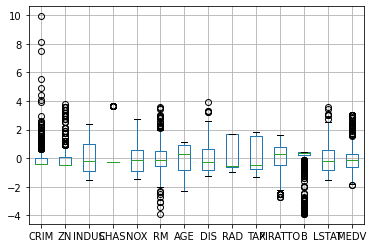

In [87]:
box=df.boxplot(column=col_names)
plt.show(box)

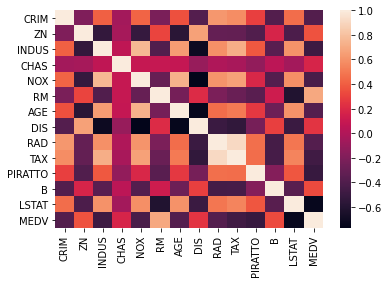

In [96]:
corr=df.corr()

sns.heatmap(corr)

In [97]:
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,test_size=30)


In [103]:
model=Sequential()
model.add(Dense(units=20,activation='relu',input_dim=13))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['mse'])
model.fit(x_tr,y_tr,epochs=1000,batch_size=50)


Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 599.8745 - mse: 599.8745
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 128.1031 - mse: 128.1031
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 72.3829 - mse: 72.3829
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 45.3621 - mse: 45.3621
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 29.9052 - mse: 29.9052
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 23.8137 - mse: 23.8137
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 18.5464 - mse: 18.5464
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 15.5688 - mse: 15.5688
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 13.0624 - mse: 13.0624
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 11.2613 - mse: 11.2613
Epoch 11/1000
10/10 [====

In [104]:

y_pred=model.predict(x_tst)
score=model.evaluate(x_tst,y_tst)
print(score)

1/1 [==============================] - 0s 104ms/step - loss: 0.5085 - mse: 0.5085
[0.5085341930389404, 0.5085341930389404]
